In [2]:
#import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [4]:
#import algorithm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#subpackage
from sklearn.metrics import accuracy_score

In [5]:
#data
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [9]:
#train data shape (rows,columns)
train_data.shape

(7352, 563)

In [12]:
#check if train data have null value
train_data.isnull().values.any()

False

In [13]:
#test data shape (rows,columns)
test_data.shape

(2947, 563)

In [14]:
#check if test data have null value
test_data.isnull().values.any()

False

In [15]:
train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [16]:
test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [17]:
#get x and y for training data
y_train = train_data['Activity']
x_train = train_data.drop(columns=['Activity','subject'])

In [18]:
#get x and y for test data
y_test = test_data['Activity']
x_test = test_data.drop(columns=['Activity','subject'])

In [20]:
#count number of records for each activity
count_of_each_activity = np.array(y_train.value_counts())

#identify unique activity and sort it by order
activities = sorted(y_train.unique())

([<matplotlib.patches.Wedge at 0x7f097d1b7438>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

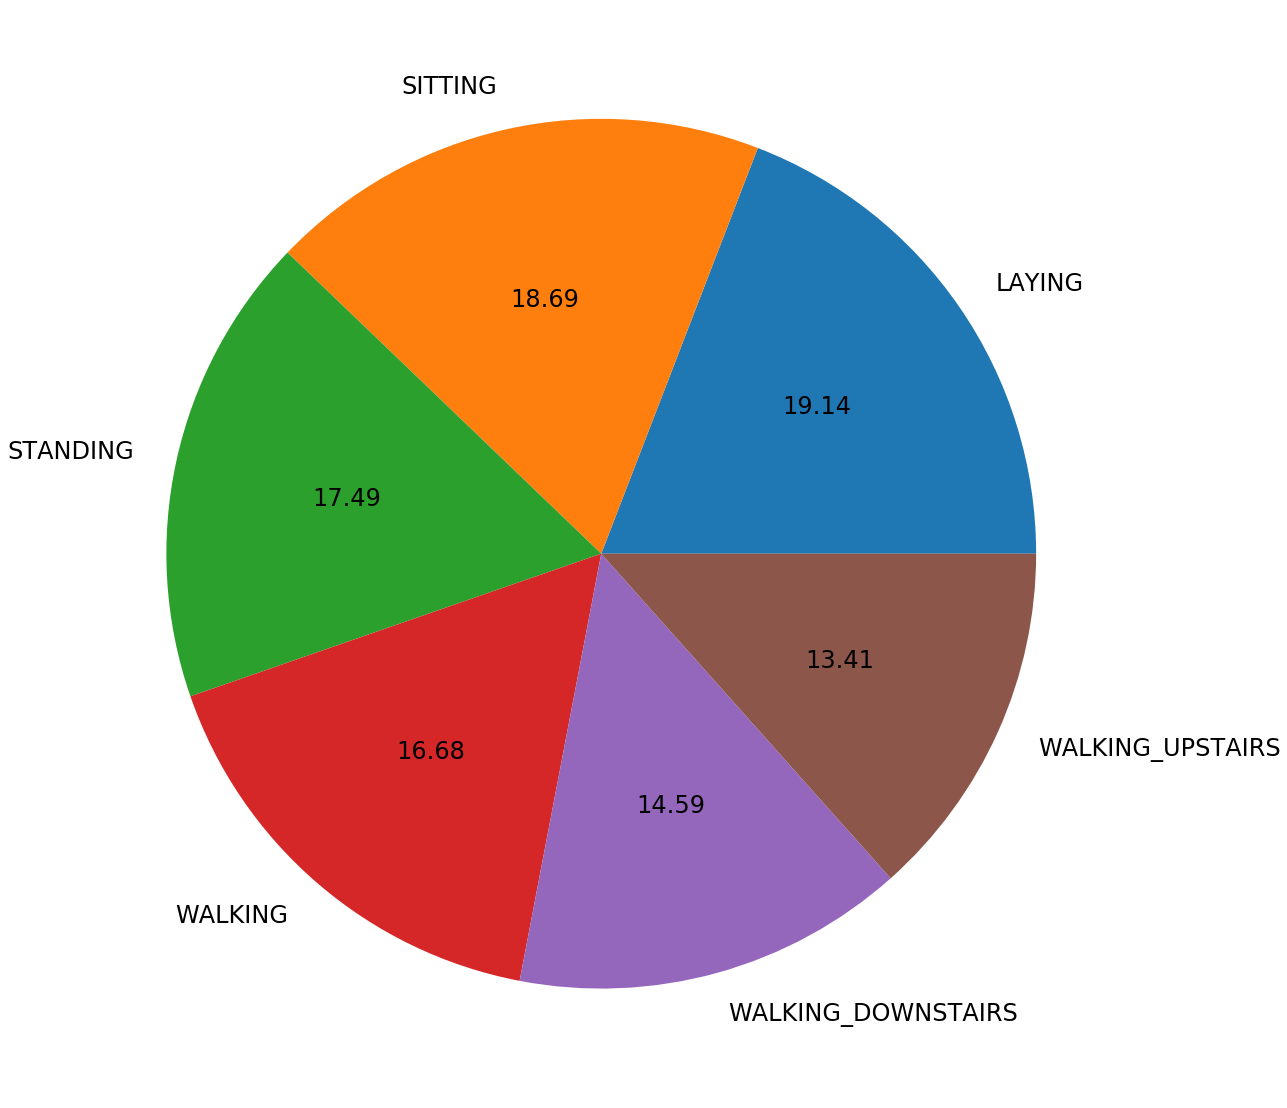

In [22]:
#plot pie chart for different activities
plt.rcParams.update({'figure.figsize':[20,20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct= '%0.2f')


In [23]:
#count for each type
acc = 0
gyro = 0
others = 0

for column in x_train.columns :
    if 'Acc' in str(column):
        acc +=1
    elif 'Gyro' in str(column):
        gyro+=1
    else :
        others+=1

<BarContainer object of 3 artists>

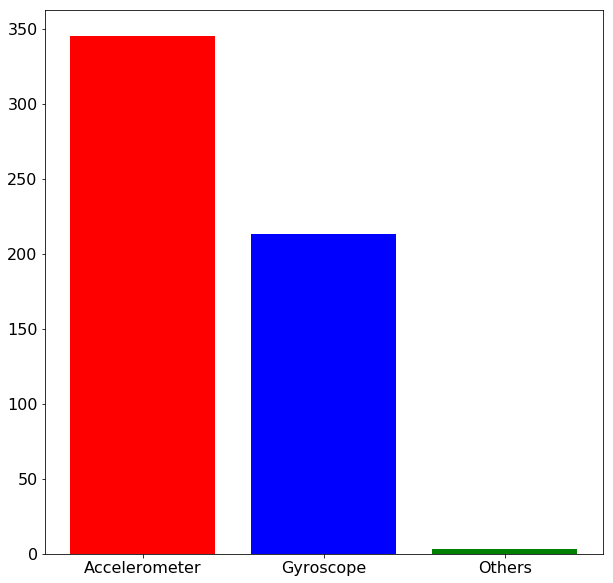

In [24]:
#show bar for all type
plt.rcParams.update({'figure.figsize': [10,10], 'font.size':16})
plt.bar(['Accelerometer','Gyroscope','Others'],[acc,gyro,others], color =('r','b','g'))

In [25]:
#inspect for standing activity over a time period

#select all row which have standing activity
standing_activity = train_data[train_data['Activity']=='STANDING']

#reset index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)


In [26]:
#set time series for each subject
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])

for row_number in range(standing_activity.shape[0]) :
    if (row_number == 0 or standing_activity.iloc[row_number]['subject']== standing_activity.iloc[row_number-1]['subject']):
        time_series[index] =  time
        time += 1
    else :
        time_series[index] = 1
        time = 2
    index += 1

In [27]:
#combine time_series with standing_activity dataframe
time_series_df = pd.DataFrame({'Time' : time_series})
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

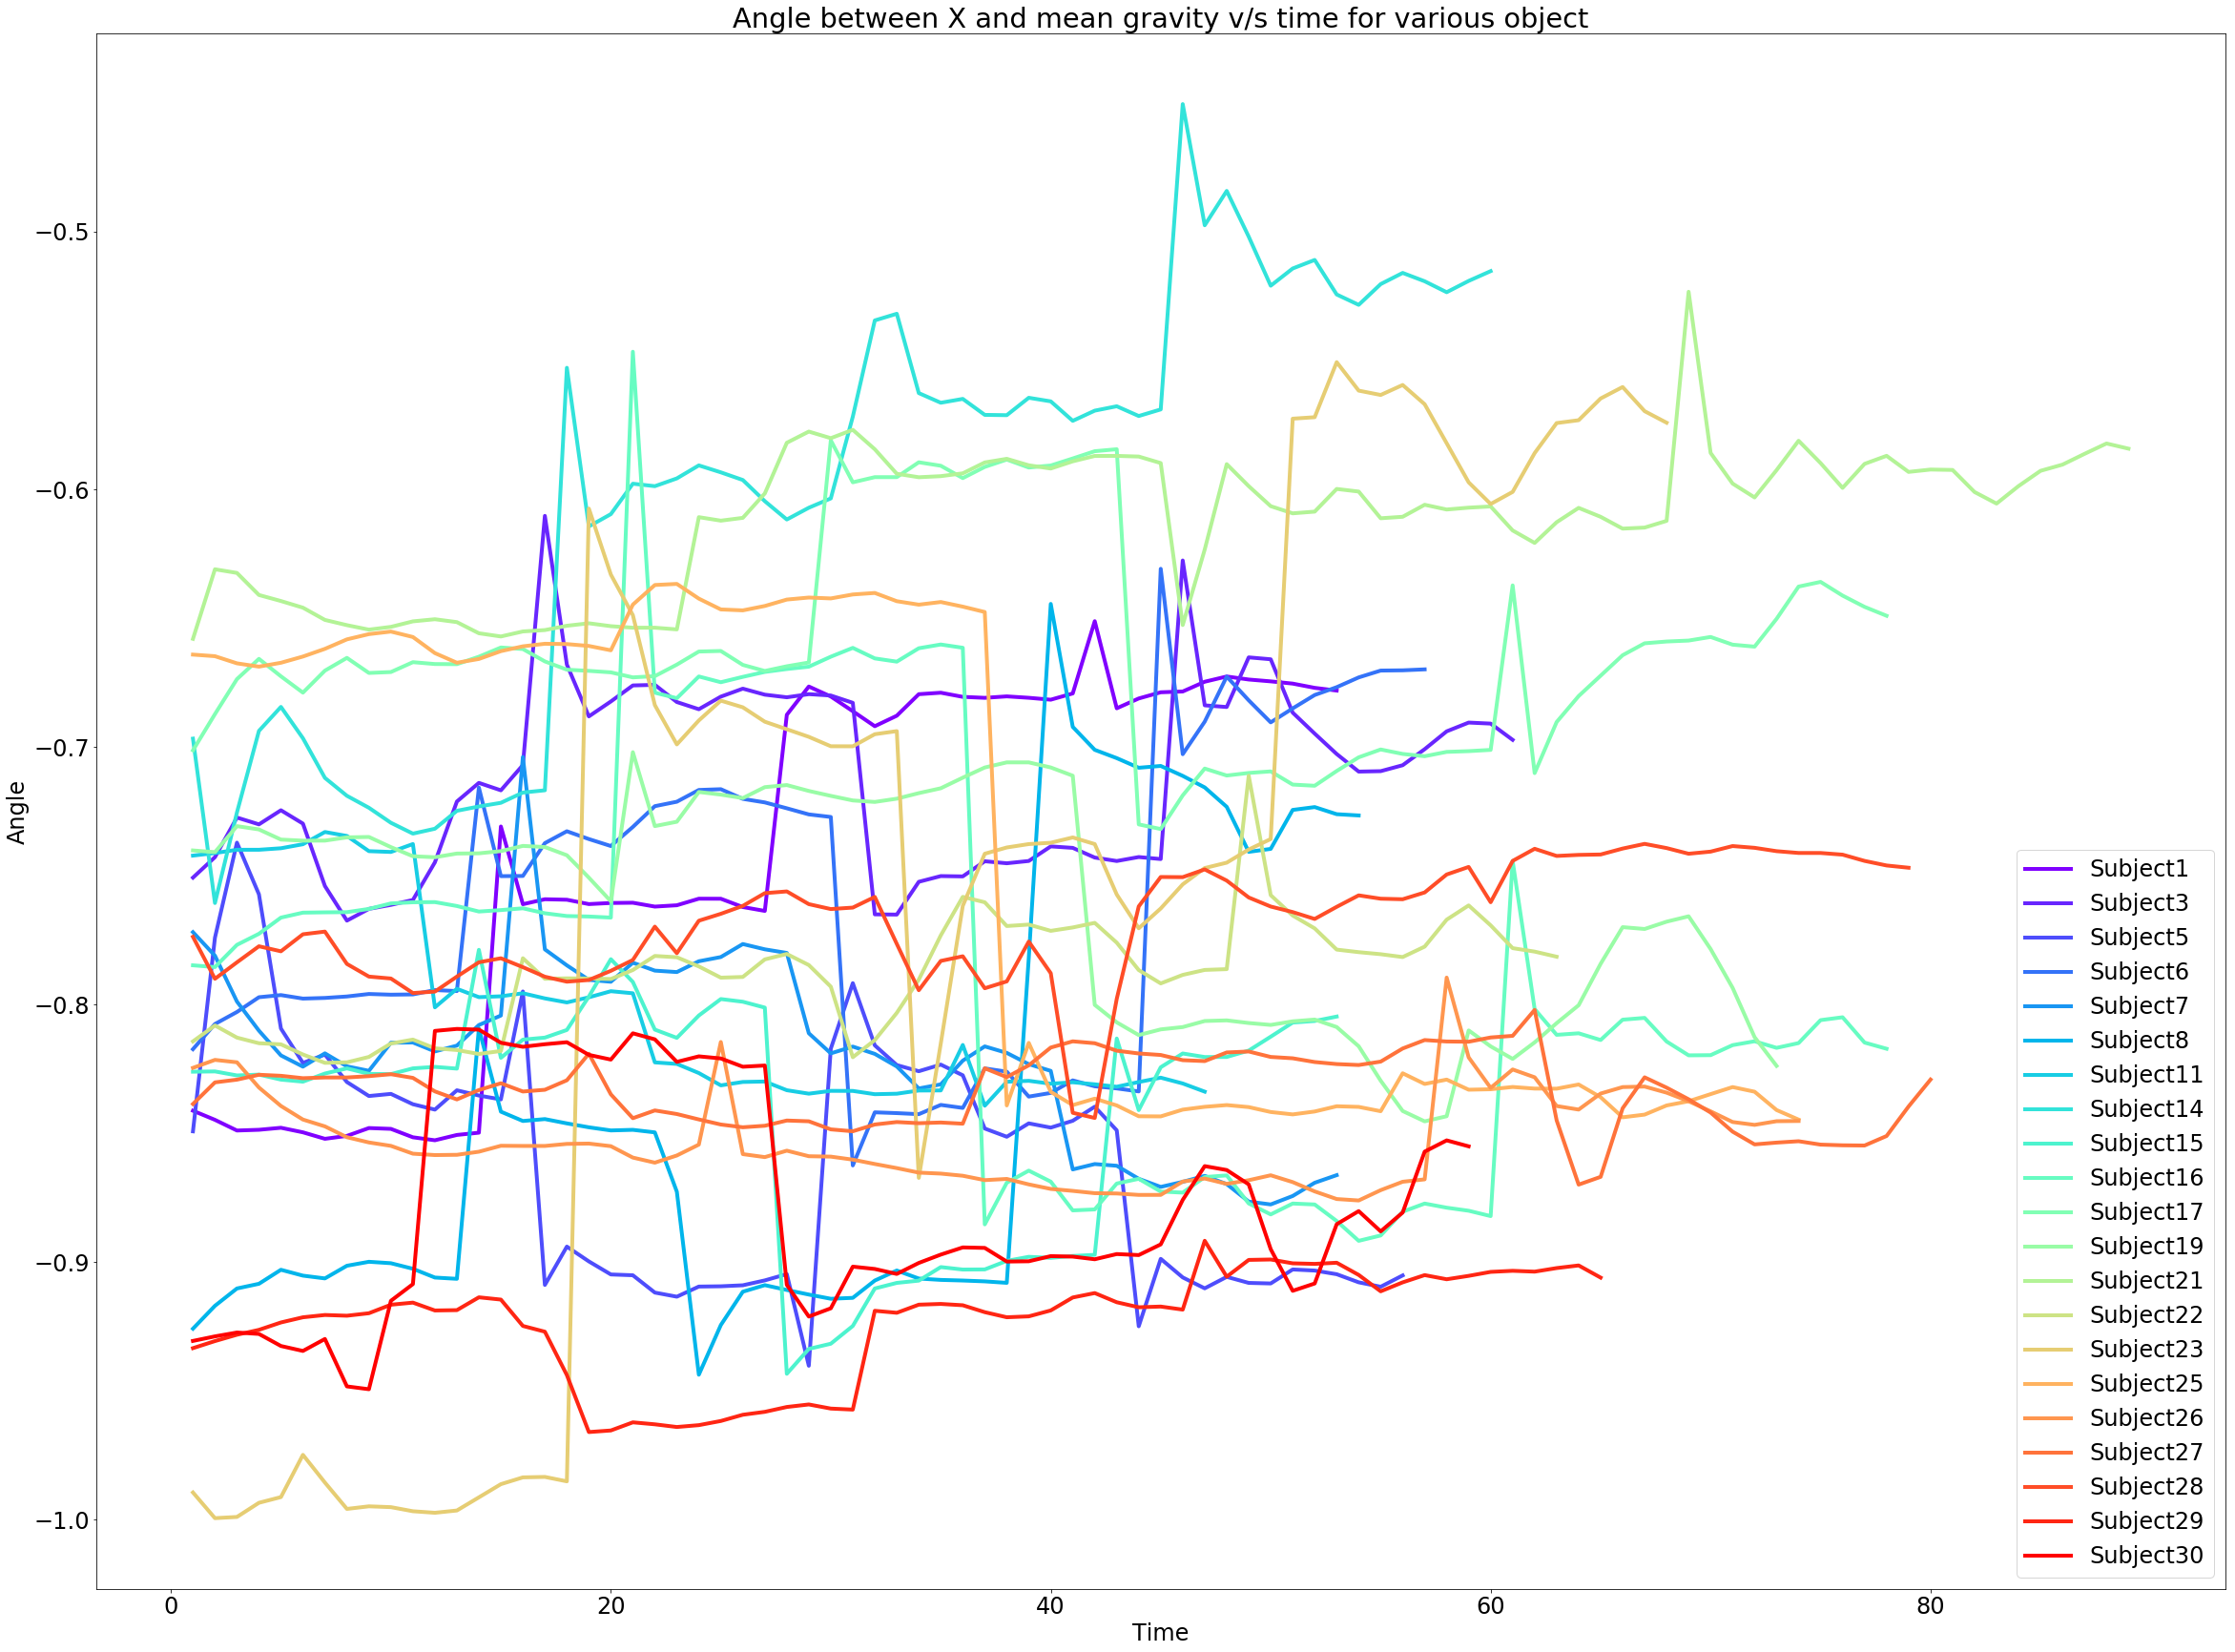

In [28]:
#plot the data

#get list of colors
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

#create plot for each subject, which will all displayed overlapping on one plot
id = 0

for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize':[40,30],'font.size':24})
    plt.plot(standing_activity_df[standing_activity_df['subject']==subject]['Time'],
             standing_activity_df[standing_activity_df['subject']==subject]['angle(X,gravityMean)'],
             c = colors[id], label = 'Subject'+ str(subject), linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean gravity v/s time for various object')
    plt.legend(prop = {'size':24})
    id+=1

In [29]:
#Classify Activities

#array of zeros of size 4 to store accuracy for each algorithm
accuracy_scores = np.zeros(4)

In [32]:
#support vector classifier
svc_clf = SVC(gamma = 'auto').fit(x_train,y_train)
prediction = svc_clf.predict(x_test)
accuracy_scores[0] =  accuracy_score (y_test,prediction)*100 #*100 to convert into precentage
print('accuracy : {}%'.format(accuracy_scores[0]))

accuracy : 94.02782490668477%


In [42]:
#logistic regression
lgr_clf = LogisticRegression().fit(x_train,y_train)
prediction = lgr_clf.predict(x_test)
accuracy_scores[1] = accuracy_score(y_test,prediction)*100
print('accuracy : {}%'.format(accuracy_scores[1]))

/home/riyadis008/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/riyadis008/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy : 96.19952494061758%


In [43]:
#K Nearest Neighbor
knn_clf = KNeighborsClassifier().fit(x_train,y_train)
prediction = knn_clf.predict(x_test)
accuracy_scores[2] = accuracy_score(y_test,prediction)*100
print('accuracy : {}%'.format(accuracy_scores[2]))

accuracy : 90.02375296912113%


In [45]:
#Random Forest
rf_clf = RandomForestClassifier().fit(x_train,y_train)
prediction = rf_clf.predict(x_test)
accuracy_scores[3] = accuracy_score(y_test,prediction)*100
print('accuracy : {}%'.format(accuracy_scores[3]))

/home/riyadis008/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy : 89.58262639972854%


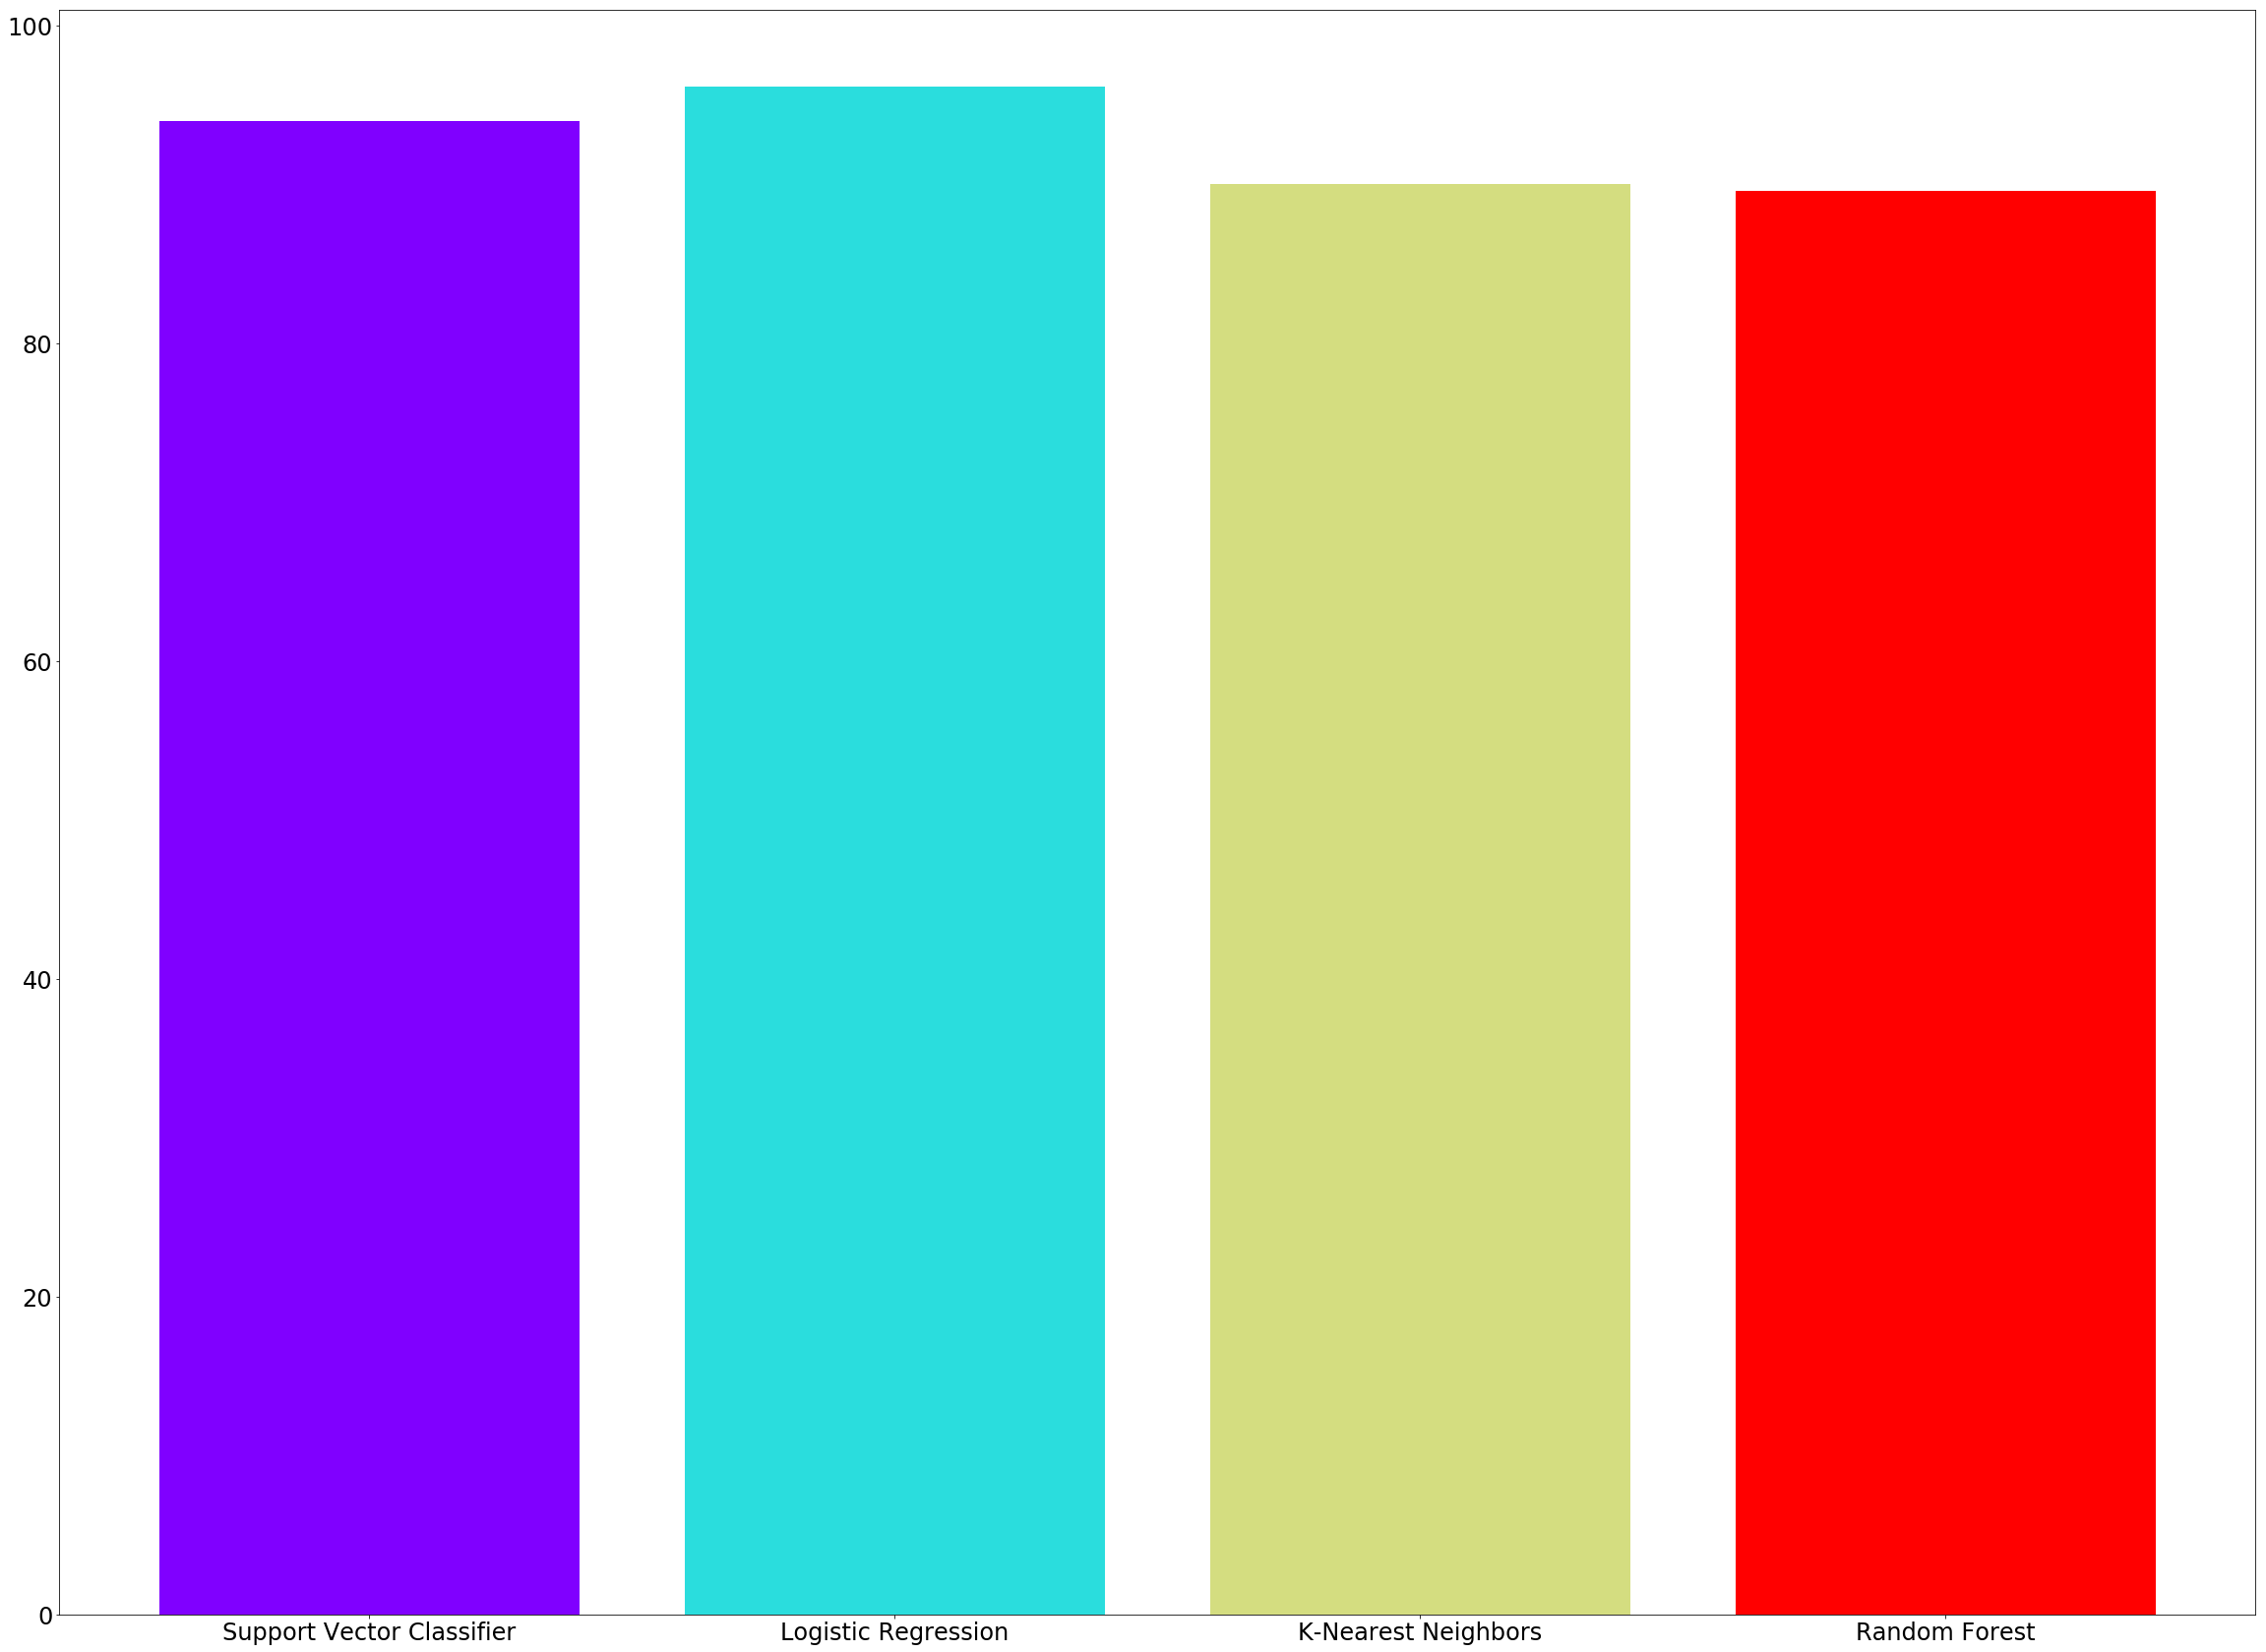

In [46]:
#plot the accuracy
colors = cm.rainbow(np.linspace(0,1,4))
labels = ['Support Vector Classifier','Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']
plt.bar(labels,accuracy_scores,color = colors)
plt.xlabel = ('Classifier')
plt.ylabel = ('Accuracy')
plt.title = ('Accuracy of various algorithm')